# Clean and Analyze Employee Exit Surveys

## Scenario

We receive exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Slight modifications to the original datasets have been made, i.e. the encoding has been changed from `cp1252` to `UTF-8`.

## Goal

We play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Results

The primary reason for an employee who exited from either DETE or TAFE was resignation due to job dissatisfaction.

27% of those who resigned due to job dissatisfaction were between 40-50 years old, followed by those in their 30-40s (21%) and 20-30s (20%). It would appear that those in the older population were more satisfied since the second most frequent reason for leaving a company was retirement.

Tenure also had an impact as most dissatisfied employees who left the company worked at either institute for less than 4 years. This pattern decreases as the number of service years goes up.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Importing the dataset

In [2]:
dete_data = pd.read_csv("dete_survey.csv")
tafe_data = pd.read_csv("tafe_survey.csv")

## Exploring the dataset

In [3]:
print(dete_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
print(tafe_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
dete_nulls = dete_data.isnull().sum()
dete_nulls.sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Initiative                               9
Performance

In [6]:
tafe_nulls = tafe_data.isnull().sum()
tafe_nulls.sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Travel                                     265
Contributing Factors. Other                                      265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
Institute                                                          0
WorkArea                                                           0
Record ID                                                          0
Length: 72, dtype: int64

In [7]:
dete_data.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [8]:
tafe_data.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [9]:
dete_data.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_data.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [11]:
dete_data["SeparationType"].value_counts()

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [12]:
tafe_data["Reason for ceasing employment"].value_counts()

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

**DETE Data**:
The DETE data is succinct in terms of column names. It has 822 rows and 56 columns. Some columns like 'DETE Start Date' and 'Role Start Date' have NaN values that are written as 'Not Stated'.

**TAFE Data**:
The TAFE data will need cleaning as the column names are structured questions. These will need to be renamed into brief keywords. This data has 702 rows and 72 columns. Some columns have NaN values that are written with a '-'.

The datasets have a large amount of columns that we will disregard. Consolidating the three resignation types in the DETE dataset, it looks like the primary reason for employment separation is `resignation` at both DETE and TAFE. `Retirement` comes close at DETE so we may want to see if the average age is higher than that at TAFE.

In [13]:
dete_data[["Gender", "SeparationType"]].value_counts()

Gender  SeparationType                      
Female  Age Retirement                          192
        Resignation-Other reasons               121
Male    Age Retirement                           83
Female  Resignation-Other employer               64
        Resignation-Move overseas/interstate     48
        Voluntary Early Retirement (VER)         44
        Ill Health Retirement                    40
        Other                                    39
Male    Resignation-Other employer               26
        Resignation-Other reasons                26
        Voluntary Early Retirement (VER)         21
        Ill Health Retirement                    19
Female  Contract Expired                         18
Male    Resignation-Move overseas/interstate     17
        Contract Expired                         16
        Other                                     9
        Termination                               8
Female  Termination                               7
Name: count, dtype:

In [14]:
tafe_data[["Gender. What is your Gender?","Reason for ceasing employment"]].value_counts()

Gender. What is your Gender?  Reason for ceasing employment
Female                        Resignation                      191
Male                          Resignation                       99
Female                        Contract Expired                  81
                              Retrenchment/ Redundancy          45
Male                          Retrenchment/ Redundancy          43
Female                        Retirement                        37
Male                          Retirement                        33
                              Contract Expired                  26
Female                        Termination                       19
                              Transfer                          16
Male                          Transfer                           4
                              Termination                        2
Name: count, dtype: int64

More females than males leave the companies with the highest reason being resignation. This either may indicate a higher population of females at the companies or job cultures and/or work environments negatively impacting females.

## Cleaning the data

We saw that the 'DETE Start Date' and 'Role Start Date' columns at a glance in the DETE dataset wrote NaN values as `Not Stated`. We'll rewrite these in as `NaN` so that the values are properly analyzed.

In [15]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

There are survey questions that appear to be redundant or have a large amount of NaN values. These include the columns in indices 28-48 and 51-55. We'll remove these.

In [16]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated = dete_survey_updated.iloc[:,:-5]

In [17]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,False,False,False,False,False,True,False,False,Female,61 or older


The TAFE dataset has a large number of survey questions for which the employee did not provide answers to. We remove all these columns except for the ones pertaining to contributing factors.

In [18]:
tafe_survey_updated = tafe_data.drop(tafe_data.columns[17:66], axis=1)

In [19]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Cleaning column names

The DETE and TAFE datasets contain many of the same information but their columns are labeled differently. To eventually be able to merge these datasets, we want to standardize the column names. First, we take an inventory of columns we want to keep in each dataset.


| dete_survey | tafe_survey | Definition |
| :-------- | :------- | :------ |
| ID | Record ID | ID used to identify the employee<br>- starts at 1 for DETE<br>- starts with [6][0-9]{17} (18 digits) for TAFE |
| SeparationType | Reason for ceasing employment | The reason why the employee's employment ended |
| Cease Date | CESSATION YEAR | The date or year the employee's employment ended |
| DETE Start Date | | The year the employee started at DETE |
| | Lengthof Service Overall. Overall Length of Service at Institute (in years) | The employment duration of the employee at TAFE |
| Age | CurrentAge. Current Age | The employee's age |
| Gender | Gender. What is your Gender? | The employee's gender|
| Employment Status | Employment Type. Employment Type | The employee's employment type |


In the DETE dataset, we apply the following transformations to the column names:
- Change to lowercase
- Strip off whitespace
- Replace spaces with underscores
- Manually change column names

In [20]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ", "_").str.lower().str.strip()

In [21]:
dete_survey_updated = dete_survey_updated.rename({
    "none_of_the_above": "no_factor_provided",
    
}, axis=1)

In [22]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'no_factor_provided', 'gender', 'age'],
      dtype='object')

In the DETE survey, we want to consolidate the three resignation categories into one called 'Resignation'.

In [23]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [24]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.replace("-Other reasons", "").str.replace("-Other employer", "").str.replace("-Move overseas/interstate", "")

In [25]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64

In the TAFE dataset, we apply the following transformations to the column names:
- Remove noisy redundant words
- Manually change columns that contain similar data to DETE to lowercase
- Strip off whitespace

In [26]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("Contributing Factors. ", "")

In [27]:
tafe_survey_updated = tafe_survey_updated.rename({
    "Record ID": "id", 
    "Reason for ceasing employment": "separationtype",
    "Career Move - Public Sector ": "career_move_to_public_sector",
    "Career Move - Private Sector ": "career_move_to_private_sector",
    "Career Move - Self-employment": "career_move_to_self_employment",
    "Interpersonal Conflict": "interpersonal_conflicts",
    "CESSATION YEAR": "cease_date",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "length_service",
    "CurrentAge. Current Age": "age",
    "Gender. What is your Gender?": "gender",
    "Employment Type. Employment Type": "employment_status",
    "Classification. Classification": "classification",
    "LengthofServiceCurrent. Length of Service at current workplace (in years)": "length_service_current",
    "NONE": "no_factor_provided"
}, axis=1)

tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [28]:
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'career_move_to_self_employment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflicts',
       'study', 'travel', 'other', 'no_factor_provided', 'gender', 'age',
       'employment_status', 'classification', 'length_service',
       'length_service_current'],
      dtype='object')

## Filtering the data to resignations only

Recall the company separation distribution for each company.

In [29]:
dete_survey_updated["separationtype"].value_counts()

separationtype
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64

In [30]:
tafe_survey_updated["separationtype"].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

At both DETE and TAFE, the primary reason an employee leaves the company is resignation. We'll want to explore this in more depth by focusing on only the resignations.

In [31]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

## Verifying the data

We don't want to assume all the information in the datasets we've been provided are correct. As these are exit surveys, we focus on verifying whether the employment start and end dates are reasonable.

In [32]:
dete_resignations["cease_date"].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [33]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")

dete_resignations["cease_date"].value_counts().sort_values()

cease_date
2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: count, dtype: int64

In [34]:
dete_resignations["dete_start_date"].value_counts().sort_values()

dete_start_date
1987.0     1
1975.0     1
1984.0     1
1971.0     1
1973.0     1
1972.0     1
1963.0     1
1977.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1985.0     3
2001.0     3
1986.0     3
1995.0     4
1988.0     4
1991.0     4
1989.0     4
1993.0     5
1980.0     5
1990.0     5
1997.0     5
2002.0     6
1998.0     6
1996.0     6
1992.0     6
2003.0     6
1994.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2007.0    21
2012.0    21
2008.0    22
2011.0    24
Name: count, dtype: int64

In [35]:
tafe_resignations["cease_date"].value_counts().sort_values()

cease_date
2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: count, dtype: int64

As this data was gathered by only the employees who submitted an exit survey, we see that the earliest separation year for DETE is 2006. There was no data for years 2007, 2008, 2009, and 2011 between 2006 and 2014. Further analysis will need to be made as to whether the company adopted a different exit survey strategy as this may be more plausible than having years where employee attrition due to resignation was truly zero.

On the other hand, we have exit survey data for resigned employees in all years between 2009 and 2013 for TAFE.

We also see that the numbers have increased over the years for both companies. This can be attributed to company growth and further analysis will need to be performed based on the company's annual population to see whether the attrition rate due to resignation increased. 

## Creating a new column

**One of our goals is to understand if employees who were at the company for a short period of time are resigning due to job dissatisfaction and explore what impacts those who've been at the company longer.**

The TAFE dataset has a `length_service` column which we also want to add to the DETE dataset.

In [36]:
dete_resignations["length_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [37]:
dete_resignations["length_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: length_service, dtype: float64

## Identifying dissatisfied employees

In [38]:
tafe_resignations["dissatisfaction"].value_counts(dropna=False)

dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [39]:
tafe_resignations["job_dissatisfaction"].value_counts(dropna=False)

job_dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

We refactor the values to boolean if `-` or the `contributing factor` is provided.

In [40]:
def update_factor(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [41]:
# Group up 'dissatisfaction' and 'job_dissatisfaction' into one column: 'dissatisfied'
tafe_resignations["dissatisfied"] = tafe_resignations[["dissatisfaction", "job_dissatisfaction"]].applymap(update_factor).any(axis=1, skipna=False)

# Group up 'study' and 'travel' similar to DETE dataset column: 'study/travel'
tafe_resignations["study/travel"] = tafe_resignations[["study", "travel"]].applymap(update_factor).any(axis=1, skipna=False)

In [42]:
# Convert the rest of the contributing factors for TAFE into boolean

TAFE_contribs = ['career_move_to_public_sector', 
                 'career_move_to_private_sector',
                 'career_move_to_self_employment', 
                 'ill_health', 
                 'maternity/family',
                 'dissatisfaction', 
                 'job_dissatisfaction', 
                 'interpersonal_conflicts',
                 'other',
                 'no_factor_provided', 
                ]
for columnName in TAFE_contribs:
    tafe_resignations[columnName] = tafe_resignations[columnName].apply(update_factor).any(skipna=False)

In [43]:
tafe_resignations.head()

,id,institute,workarea,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,career_move_to_self_employment,ill_health,maternity/family,...,other,no_factor_provided,gender,age,employment_status,classification,length_service,length_service_current,dissatisfied,study/travel
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,True,True,True,True,True,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,True,True,True,True,True,...,True,True,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,True,True,True,True,True,...,True,True,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,True,True,True,True,True,...,True,True,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,True,True,True,True,True,...,True,True,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,False


We save a copy of the cleaned data into a new dataframe called `tafe_resign_updated`.

In [44]:
tafe_resign_updated = tafe_resignations.copy()

In [45]:
tafe_resign_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'career_move_to_self_employment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflicts',
       'study', 'travel', 'other', 'no_factor_provided', 'gender', 'age',
       'employment_status', 'classification', 'length_service',
       'length_service_current', 'dissatisfied', 'study/travel'],
      dtype='object')

In [46]:
tafe_resign_updated["dissatisfied"].value_counts()

dissatisfied
False    241
True      99
Name: count, dtype: int64

We first define what job dissatisfaction might mean based on the columns in the DETE dataset. While there already exists a `job dissatisfaction` column, there are a handful of other categories that can clue one in to what other factors might have led the employee to resign due to job dissatisfaction. We'll want to identify these.

In [47]:
dete_dissatisfied = ["job_dissatisfaction", 
                     "dissatisfaction_with_the_department", 
                     "physical_work_environment", 
                     "lack_of_recognition", 
                     "lack_of_job_security", 
                     "work_location", 
                     "employment_conditions", 
                     "work_life_balance", 
                     "workload"
                    ]

In [48]:
dete_resignations["dissatisfied"] = dete_resignations[dete_dissatisfied].any(axis=1, skipna=False)

In [49]:
dete_resign_updated = dete_resignations.copy()

In [50]:
dete_resign_updated["dissatisfied"].value_counts()

dissatisfied
False    162
True     149
Name: count, dtype: int64

## Combining the data

Before we combine the data, we want to make sure the two datasets are clean.

In [51]:
dete_resign_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'no_factor_provided', 'gender', 'age', 'length_service',
       'dissatisfied'],
      dtype='object')

In [52]:
tafe_resign_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'career_move_to_self_employment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflicts',
       'study', 'travel', 'other', 'no_factor_provided', 'gender', 'age',
       'employment_status', 'classification', 'length_service',
       'length_service_current', 'dissatisfied', 'study/travel'],
      dtype='object')

We first add/update the 'institute' column so we can differentiate which dataset each row belongs to.

In [53]:
dete_resign_updated["institute"] = "DETE"
tafe_resign_updated["institute"] = "TAFE"

Then we combine the two datasets.

In [54]:
combined_resign = pd.concat([dete_resign_updated, tafe_resign_updated], ignore_index = True)

In [55]:
combined_resign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   651 non-null    float64
 1   separationtype                       651 non-null    object 
 2   cease_date                           635 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       451 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    597 non-null    object 
 10  career_move_to_public_sector         651 non-null    bool   
 11  career_move_to_private_sector   

We still have a large number of columns so we identify the columns with the most null values.

In [56]:
combined_resign.notnull().sum().sort_values(ascending=False)

id                                     651
career_move_to_private_sector          651
institute                              651
dissatisfied                           651
no_factor_provided                     651
ill_health                             651
study/travel                           651
separationtype                         651
job_dissatisfaction                    651
interpersonal_conflicts                651
maternity/family                       651
career_move_to_public_sector           651
cease_date                             635
employment_status                      597
age                                    596
gender                                 592
length_service                         563
classification                         451
other                                  340
dissatisfaction                        340
career_move_to_self_employment         340
workarea                               340
travel                                 332
study      

It looks like the relevant columns have 500 or more non-null values so we'll drop the columns with less than that.

In [57]:
combined_resign_updated = combined_resign.dropna(thresh=500, axis=1).copy()

In [58]:
combined_resign_updated.columns

Index(['id', 'separationtype', 'cease_date', 'employment_status',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'interpersonal_conflicts', 'job_dissatisfaction', 'maternity/family',
       'study/travel', 'ill_health', 'no_factor_provided', 'gender', 'age',
       'length_service', 'dissatisfied', 'institute'],
      dtype='object')

In [59]:
combined_resign_updated.head()

,id,separationtype,cease_date,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,maternity/family,study/travel,ill_health,no_factor_provided,gender,age,length_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Permanent Full-time,False,True,False,False,False,False,False,False,Female,36-40,7.0,False,DETE
1,6.0,Resignation,2012.0,Permanent Full-time,False,True,False,False,True,False,False,False,Female,41-45,18.0,True,DETE
2,9.0,Resignation,2012.0,Permanent Full-time,False,True,False,False,False,False,False,False,Female,31-35,3.0,False,DETE
3,10.0,Resignation,2012.0,Permanent Part-time,False,False,True,True,False,False,False,False,Female,46-50,15.0,True,DETE
4,12.0,Resignation,2012.0,Permanent Full-time,False,False,False,False,True,False,False,False,Male,31-35,3.0,False,DETE


## Cleaning the combined columns

In [60]:
for columnName in combined_resign_updated.columns:
    print(combined_resign_updated[columnName].unique())

[4.00000000e+00 6.00000000e+00 9.00000000e+00 1.00000000e+01
 1.20000000e+01 1.30000000e+01 1.50000000e+01 1.70000000e+01
 2.10000000e+01 2.20000000e+01 2.30000000e+01 2.40000000e+01
 2.60000000e+01 2.80000000e+01 3.40000000e+01 3.50000000e+01
 3.80000000e+01 4.00000000e+01 4.10000000e+01 4.20000000e+01
 4.30000000e+01 4.40000000e+01 4.90000000e+01 5.10000000e+01
 5.20000000e+01 5.60000000e+01 5.80000000e+01 6.20000000e+01
 7.00000000e+01 7.20000000e+01 8.80000000e+01 9.10000000e+01
 9.40000000e+01 1.00000000e+02 1.01000000e+02 1.03000000e+02
 1.04000000e+02 1.07000000e+02 1.09000000e+02 1.12000000e+02
 1.13000000e+02 1.15000000e+02 1.17000000e+02 1.19000000e+02
 1.25000000e+02 1.27000000e+02 1.31000000e+02 1.33000000e+02
 1.36000000e+02 1.39000000e+02 1.41000000e+02 1.46000000e+02
 1.48000000e+02 1.59000000e+02 1.61000000e+02 1.65000000e+02
 1.80000000e+02 1.84000000e+02 1.86000000e+02 1.90000000e+02
 1.93000000e+02 1.96000000e+02 1.97000000e+02 1.98000000e+02
 2.05000000e+02 2.060000

The two datasets have a few formatting differences so we need to clean those out, namely in the 'age' and 'length_service' columns.

## Cleaning the combined age column

In [61]:
combined_resign_updated["age"].value_counts(dropna=False)

age
51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

The `age` data for DETE is well-structured so we will use it as the basis for reformatting the ages in the new combined dataset.

In [62]:
dete_resignations["age"].unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger'], dtype=object)

In [63]:
tafe_resignations["age"].unique()

array([nan, '41  45', '56 or older', '20 or younger', '46  50', '36  40',
       '21  25', '31  35', '26  30', '51-55'], dtype=object)

In [64]:
def update_age(x):
    match x:
        case '36-40' | '36  40' | '31-35' | '31  35':
            x_new = '30-40'
        case '41-45' | '46-50' | '41  45' | '46  50':
            x_new = '40-50'
        case '56-60' | '61 or older':
            x_new = '56 or older'
        case '21-25' | '26-30' | '21  25' | '26  30':
            x_new = '20-30'
        case _:
            x_new = x
    return x_new

In [65]:
combined_resign_updated["age"] = combined_resign_updated["age"].apply(update_age)

In [66]:
combined_resign_updated["age"].value_counts(normalize=True, dropna=False)

age
40-50            0.267281
30-40            0.205837
20-30            0.198157
56 or older      0.119816
51-55            0.109063
NaN              0.084485
20 or younger    0.015361
Name: proportion, dtype: float64

A little over a quarter of the employees who resigned from DETE or TAFE were between 40-50 years old. The population of 50 years or older employees who resigned is half that of the population between 20-40 years old. 

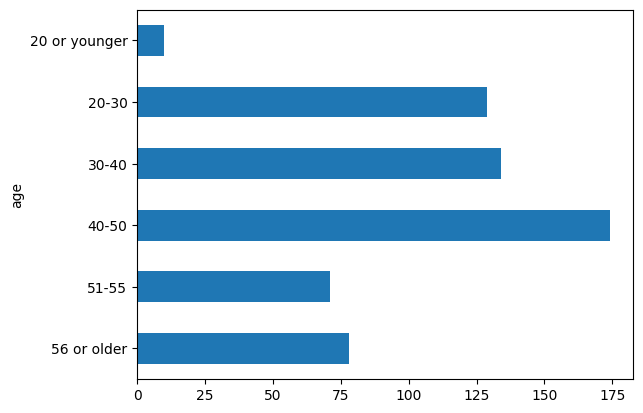

In [67]:
combined_resign_updated["age"].value_counts().sort_index().plot(kind="barh")
plt.gca().invert_yaxis()

## Cleaning the combined length of service column

In [68]:
combined_resign_updated["length_service"].value_counts(dropna=False)

length_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0      

The length of service is hard to analyze with many continuous values so, in addition to cleaning up the values, we will also bucket them into job levels based on years of service.

The DETE length of service format is structured in a usable way so we will create labels for these job levels.

Job levels (Years of Experience):
- T0: Short-term (< 1): most likely contract, seasonal, or intern work
- T1: Entry-level (1-2)
- T2: Early (3-4)
- T3: Mid (5-6)
- T4: Senior (7-10)
- T5: Director (11-20)
- T6: Executive (More than 20 years)

First we convert the string formatted service lengths into usable numbers. We'll pick arbitrary numbers for each bucketed group because these will be rolled up anyway.

In [69]:
def clean_length_service(y):
    match y:
        case "Less than 1 year":
            y_new = 0.5
        case "1-2":
            y_new = 1.5
        case "3-4":
            y_new = 3.5
        case "5-6":
            y_new = 5.5
        case "7-10":
            y_new = 8.5
        case "11-20":
            y_new = 15
        case "More than 20 years":
            y_new = 20
        case _:
            y_new = y
    return y_new

In [70]:
combined_resign_updated["length_service"] = combined_resign_updated["length_service"].apply(clean_length_service)

In [71]:
combined_resign_updated["length_service"].unique()

array([ 7. , 18. ,  3. , 15. , 14. ,  5. ,  nan, 30. , 32. , 39. , 17. ,
        9. ,  6. ,  1. , 35. , 38. , 36. , 19. ,  4. , 26. , 10. ,  8. ,
        2. ,  0. , 23. , 13. , 16. , 12. , 21. , 20. , 24. , 33. , 22. ,
       28. , 49. , 11. , 41. , 27. , 42. , 25. , 29. , 34. , 31. ,  3.5,
        8.5,  1.5,  0.5,  5.5])

Then we bucket the length of service into job levels.

In [72]:
def group_length_service(z):
    if z < 1:
        z_new = "T0: Short-term"
    elif 1 <= z < 3:
        z_new = "T1: Entry-level"
    elif 3 <= z < 5:
        z_new = "T2: Early"
    elif 5 <= z < 7:
        z_new = "T3: Mid"
    elif 7 <= z < 11:
        z_new = "T4: Senior"
    elif 11 <= z < 20:
        z_new = "T5: Director"
    elif z >= 20:
        z_new = "T6: Executive"
    else:
        z_new = z
    return z_new

In [73]:
combined_resign_updated["length_service"] = combined_resign_updated["length_service"].apply(group_length_service)

In [74]:
combined_resign_updated["length_service"].value_counts(normalize=True).sort_index()

length_service
T0: Short-term     0.165187
T1: Entry-level    0.177620
T2: Early          0.175844
T3: Mid            0.129663
T4: Senior         0.110124
T5: Director       0.134991
T6: Executive      0.106572
Name: proportion, dtype: float64

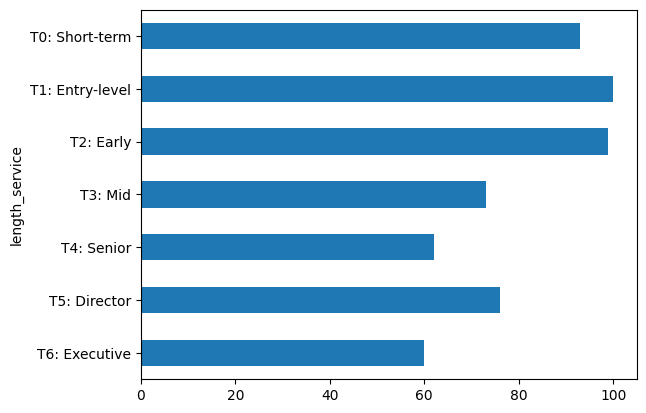

In [75]:
combined_resign_updated["length_service"].value_counts().sort_index().plot(kind="barh")
plt.gca().invert_yaxis()